# Part 1: Web Scraping and Data Wrangling

In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# URL of the IMDb page to scrape
url = 'https://www.imdb.com/chart/moviemeter/'

"""
IMDb (Internet Movie Database) is a highly suitable for web scraping movie data because,

It offers extensive information on movies, including titles, genres, directors, release years, ratings, and more.
The data is presented in a consistent and structured format, which makes it easier to scrape and parse.
IMDb is one of the most popular and reliable sources for movie information, widely used by industry professionals and movie enthusiasts.
The website is updated regularly, ensuring access to the latest information.
"""

## Web Scraping Implementation

In [ ]:
# Send a request to the website
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)

response.raise_for_status()  # Raise an HTTPError if the HTTP request returned an unsuccessful status code

In [25]:
soup = BeautifulSoup(response.text, 'html.parser')

# Find the script tag containing the JSON data
script_tag = soup.find('script', {'id': '__NEXT_DATA__'})

if not script_tag:
    raise ValueError("Couldn't find the script tag with the required JSON data.")

In [27]:
# Extract the JSON string from the script tag
json_string = script_tag.string

# Parse the JSON string into a Python dictionary
data = json.loads(json_string)

In [5]:
# Lists for store the scraped data
titles = []
genres_list = []
directors = []
release_years = []
imdb_scores = []
vote_counts = [] # Indicates the number of user ratings that have been factored into the IMDb rating.

In [6]:
# Navigate through the JSON to extract the movie details
for edge in data['props']['pageProps']['pageData']['chartTitles']['edges']:
    node = edge['node']
    title = node['titleText']['text']
    genres = [genre['genre']['text'] for genre in node['titleGenres']['genres']]
    director = node['principalCredits'][0]['credits'][0]['name']['nameText']['text']
    release_year = node['releaseYear']['year']
    imdb_score = node['ratingsSummary']['aggregateRating']
    vote_count = node['ratingsSummary']['voteCount']

    # Convert genres list to a comma-separated string
    genres_str = ', '.join(genres)

    # Print the extracted information
    # print(f'Title: {title}')
    # print(f'Genres: {genres_str}')
    # print(f'Director: {director}')
    # print(f'Release Year: {release_year}')
    # print(f'Rotten Tomatoes Score: {imdb_score}')
    # print(f'User Rating: {vote_count}')
    # print('---')

    # Add movie title
    titles.append(title)

    # Add movie genre(s)
    genres_list.append(genres_str)

    # Add movie director
    directors.append(director)

    # Add movie release year
    release_years.append(release_year)

    # Add movie Rotten Tomatoes score
    imdb_scores.append(imdb_score)

    # Add movie the user rating
    vote_counts.append(vote_count)

In [ ]:
"""
1. Code Structure and Techniques: Python libraries like requests to send HTTP requests and BeautifulSoup to parse the HTML content has used. Here’s how the code works:

  HTTP Request: The requests.get() function fetches the webpage content from IMDb’s chart page.
  User-Agent Header: The headers dictionary includes a User-Agent string to mimic a browser request, which is often necessary to avoid being blocked by the server.
  HTML Parsing: BeautifulSoup parses the HTML response and locates the <script> tag containing the JSON data (__NEXT_DATA__).
  JSON Extraction: The JSON string is extracted from the script tag and loaded into a Python dictionary using json.loads().
  Data Extraction: The code iterates over the ‘chartTitles’ key in the JSON data to extract movie details into lists.
"""

## Data Cleaning and Preprocessing

In [7]:
# Create a DataFrame from the scraped data
movies_df = pd.DataFrame({
    'Title': titles,
    'Genre': genres_list,
    'Director': directors,
    'Release Year': release_years,
    'IMDB Score': imdb_scores,
    'Vote Count': vote_counts
})

In [8]:
movies_df

,Title,Genre,Director,Release Year,IMDB Score,Vote Count
0,Civil War,"Action, Thriller",Alex Garland,2024,7.6,37344
1,Dune: Part Two,"Action, Adventure, Drama",Denis Villeneuve,2024,8.7,363803
2,The Ministry of Ungentlemanly Warfare,"Action, Drama, War",Guy Ritchie,2024,7.3,4740
3,Argylle,"Action, Comedy, Thriller",Matthew Vaughn,2024,5.7,61021
4,Abigail,"Horror, Thriller",Matt Bettinelli-Olpin,2024,7.1,6719
...,...,...,...,...,...,...
95,Crew,"Comedy, Drama",Rajesh A Krishnan,2024,6.8,24804
96,Godzilla Minus One,"Action, Adventure, Drama",Takashi Yamazaki,2023,8.3,48642
97,Baghead,Horror,Alberto Corredor,2023,5.4,5097
98,American Fiction,"Comedy, Drama",Cord Jefferson,2023,7.5,74485


In [9]:
# Clean and preprocess the data
# Handle missing values and inconsistencies
movies_df = movies_df.replace('N/A', pd.NA)

movies_df['Release Year'] = pd.to_numeric(movies_df['Release Year'], errors='coerce')
movies_df['IMDB Score'] = pd.to_numeric(movies_df['IMDB Score'], errors='coerce')
movies_df['Vote Count'] = pd.to_numeric(movies_df['Vote Count'], errors='coerce')

movies_df.dropna(subset=['Release Year'], inplace=True)
movies_df.dropna(subset=['IMDB Score'], inplace=True)
movies_df.dropna(subset=['Vote Count'], inplace=True)

In [10]:
movies_df

,Title,Genre,Director,Release Year,IMDB Score,Vote Count
0,Civil War,"Action, Thriller",Alex Garland,2024,7.6,37344
1,Dune: Part Two,"Action, Adventure, Drama",Denis Villeneuve,2024,8.7,363803
2,The Ministry of Ungentlemanly Warfare,"Action, Drama, War",Guy Ritchie,2024,7.3,4740
3,Argylle,"Action, Comedy, Thriller",Matthew Vaughn,2024,5.7,61021
4,Abigail,"Horror, Thriller",Matt Bettinelli-Olpin,2024,7.1,6719
...,...,...,...,...,...,...
94,Sweet Dreams,"Comedy, Drama, Sport",Lije Sarki,2024,5.4,446
95,Crew,"Comedy, Drama",Rajesh A Krishnan,2024,6.8,24804
96,Godzilla Minus One,"Action, Adventure, Drama",Takashi Yamazaki,2023,8.3,48642
97,Baghead,Horror,Alberto Corredor,2023,5.4,5097


In [ ]:
"""
2. Preprocessing Techniques Justification: The preprocessing steps in the code are designed to clean and structure the scraped data:

  Replacing Missing Values: The code replaces ‘N/A’ with pd.NA to handle missing values, which is a standard practice in data preprocessing.
  Data Type Conversion: The pd.to_numeric() function is used with errors='coerce' to convert strings to numeric values, turning non-convertible values into NaN, which is a safe way to handle unexpected data types.
  Dropping Missing Values: The dropna() function removes rows with missing values in critical columns. This is justified as having complete data for these columns might be essential for subsequent analysis.
  DataFrame Creation: A Pandas DataFrame is created to organize the data into a structured tabular format, which is essential for analysis and visualization.
  These preprocessing steps are crucial for ensuring the quality and consistency of the data, which directly impacts the reliability of any analysis performed on it.
"""

# Part 2: Exploratory and Predictive Analytics

## Descriptive Statistics

In [31]:
# Descriptive statistics
# Numerical attributes
numerical_stats = movies_df.describe()
print(numerical_stats)
print()

# Categorical variables
categorical_stats = movies_df.describe(include=['object'])
print(categorical_stats)

       Release Year  IMDB Score    Vote Count
count     87.000000   87.000000  8.700000e+01
mean    2019.344828    6.832184  2.446762e+05
std       10.402177    1.095285  5.294729e+05
min     1972.000000    3.800000  4.460000e+02
25%     2021.500000    6.200000  8.131500e+03
50%     2023.000000    6.800000  3.842600e+04
75%     2024.000000    7.600000  1.837325e+05
max     2024.000000    9.300000  2.886813e+06

       Title             Genre            Director
count     87                87                  87
unique    85                51                  81
top     Dune  Action, Thriller  M. Night Shyamalan
freq       2                 8                   2


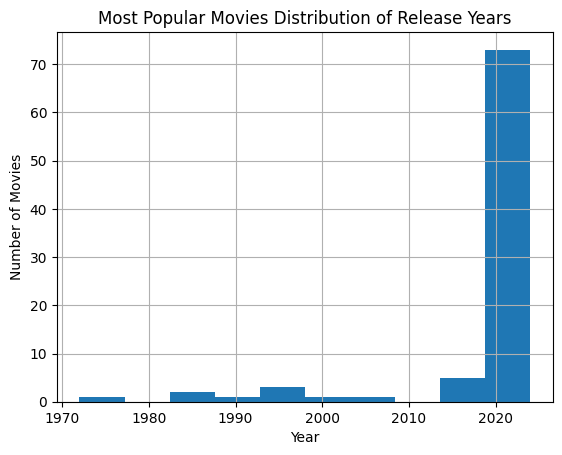

In [20]:
# Visualizations
# Histogram of Release years

movies_df['Release Year'].hist()
plt.title('Most Popular Movies Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

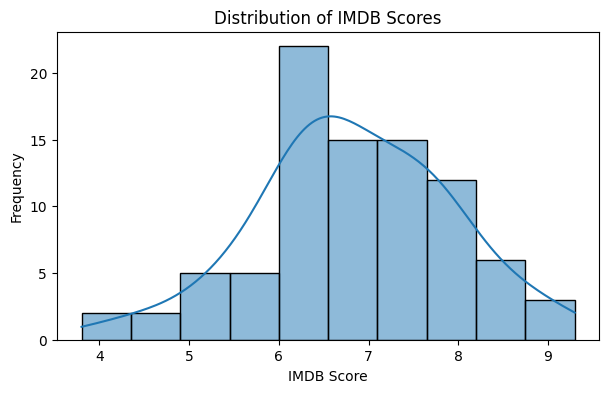

In [34]:
# Histogram for IMDB Scores

plt.figure(figsize=(7, 4))
sns.histplot(movies_df['IMDB Score'], bins=10, kde=True)
plt.title('Distribution of IMDB Scores')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.show()

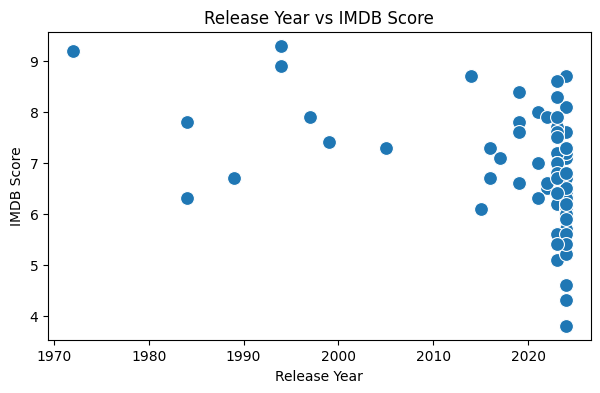

In [37]:
# Scatter Plot for Release Year vs IMDB Score

plt.figure(figsize=(7, 4))
sns.scatterplot(x='Release Year', y='IMDB Score', data=movies_df, s=100)
plt.title('Release Year vs IMDB Score')
plt.xlabel('Release Year')
plt.ylabel('IMDB Score')
plt.show()

In [ ]:
"""
Limitations:

  Data Quality: The accuracy of the scraped data depends on the structure of the IMDb page. Any changes to the page layout could affect the scraping process.
  Legal Concerns: Web scraping may violate terms of service of websites, and there’s a risk of legal issues if not done responsibly.
  Scalability: The current approach may not be efficient for scraping large volumes of data due to potential rate limits and server restrictions.

Future Work:

  Additional Data Points: Consider scraping more detailed information such as cast, crew, and user reviews for a comprehensive analysis.
  Advanced Modeling: Implement machine learning models to predict movie success based on various features extracted from the data.
  Real-time Analysis: Develop a system for real-time data scraping and analysis to capture the latest trends and ratings.
"""